# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nauval Gymnasti
- **Email:** nauvalgymnasti7@gmail.com / mc299d5y1716@student.devacademy.id
- **ID Dicoding:** nauvalgymnasti

## Menentukan Pertanyaan Bisnis

- Apakah curah hujan (RAIN) membantu mengurangi kadar partikel Karbon Monoksida?
- Bagaimana pola tren kadar karbon monoksida (CO) sepanjang tahun berdasarkan data bulanan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memuat dataset PRSA_Data_Guanyuan_20130301-20170228.csv
df_prsa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Guanyuan_20130301-20170228.csv")
df_prsa.shape
df_prsa.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


Untuk memahami struktur data, saya akan memuat dataset PRSA_Data_Guanyuan_20130301-20170228.csv dan melakukan pemrosesan data dasar sebelum melanjutkan eksplorasi data.

### Assessing Data

Cek Tipe Data

In [4]:
# Memeriksa tipe data tiap kolom pada data df_prsa
df_prsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Disini kita bisa melihat terdapat ketidaksesuaian tipe data pada kolom "year", "month", "day", dan "hour". kita juga dapat melihat bahwa terdapat pebedaan jumlah data pada beberapa kolom hal ini mengindikasikan adanya missing value.

Cek Missing Value

In [5]:
# Memeriksa missing value pada data df_prsa
print(df_prsa.isna().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Terdapat missing value di beberapa kolom

Cek Duplikasi Data

In [6]:
# Cek jumlah data duplikat pada df_prsa
print(f"Total duplikat di DataFrame PRSA: {df_prsa.duplicated().sum()}")

Total duplikat di DataFrame PRSA: 0


Tidak terdapat data yang duplikat

Deskripsi Statistik

In [7]:
# Describe data df_prsa
df_prsa.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- xxx
- xxx

### Cleaning Data

**Mengatasi Missing Value di Kolom CO**

In [8]:
# melihat data yang mengandung missing value pada kolom CO menggunakan teknik filtering
df_prsa[df_prsa.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27,28,2013,3,2,3,3.0,6.0,12.0000,32.0000,NaN,79.0,-1.4,1030.6,-17.6,0.0,NNE,1.4,Guanyuan
123,124,2013,3,6,3,160.0,189.0,102.0000,160.0000,NaN,39.0,4.0,1007.6,-6.3,0.0,NE,1.9,Guanyuan
178,179,2013,3,8,10,314.0,331.0,72.5424,220.0816,NaN,107.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Guanyuan
219,220,2013,3,10,3,16.0,30.0,14.0000,46.0000,NaN,87.0,-2.0,1021.1,-11.8,0.0,NNW,1.2,Guanyuan
315,316,2013,3,14,3,48.0,52.0,25.0000,52.0000,NaN,82.0,-0.1,1023.8,-4.7,0.0,WNW,0.5,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,35044,2017,2,28,3,NaN,NaN,NaN,NaN,NaN,NaN,7.3,1015.8,-9.6,0.0,NE,1.0,Guanyuan
35044,35045,2017,2,28,4,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1016.0,-9.4,0.0,ENE,1.9,Guanyuan
35045,35046,2017,2,28,5,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1015.9,-9.0,0.0,E,1.4,Guanyuan
35046,35047,2017,2,28,6,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1015.9,-11.2,0.0,NNW,3.1,Guanyuan


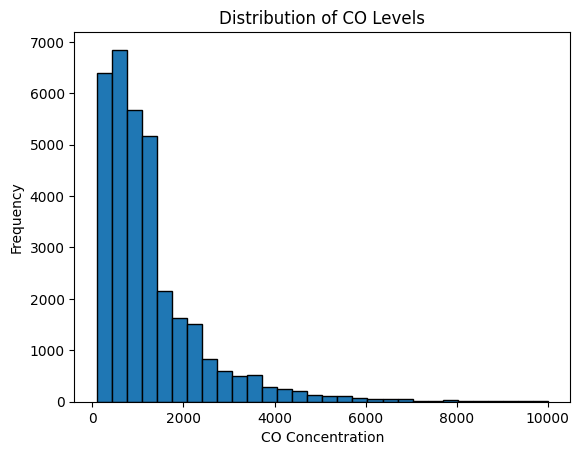

In [9]:
# cek apakah data CO terdistribusi normal?
plt.hist(df_prsa["CO"].dropna(), bins=30, edgecolor="black")
plt.xlabel("CO Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of CO Levels")
plt.show()

Data cenderung left skewed, sehingga data tergolong tidak terdistribusi normal atau tidak simetris. jumlah data adalah 35064 sedangkan jumlah missing value di kolom co adalah 1753, sehingga saya memutuskan menggunakan metode interpolasi dengan mengisi nilai kosong dengan nilai median.

In [10]:
# mengganti missing value dengan nila median
df_prsa.update(df_prsa[["CO"]].fillna(900.000000))

**Mengatasi Missing Value di Kolom O3**

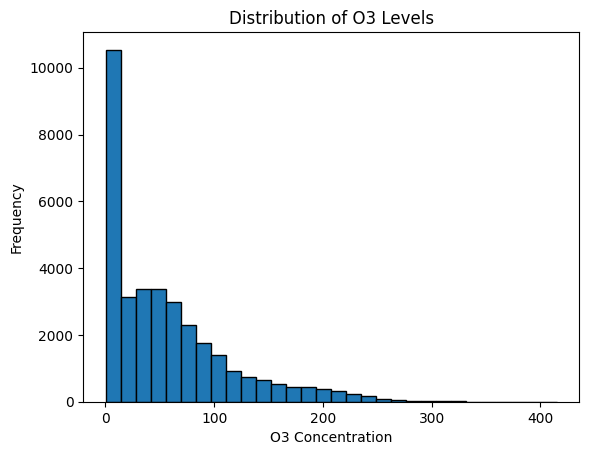

In [11]:
# cek apakah data O3 terdistribusi normal?
plt.hist(df_prsa["O3"].dropna(), bins=30, edgecolor="black")
plt.xlabel("O3 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of O3 Levels")
plt.show()

In [12]:
# mengganti missing value dengan nila median
df_prsa.update(df_prsa[["O3"]].fillna(41.000000))

# menampilkan pesan suskes
print("✅ Missing value pada kolom 'O3' berhasil diganti dengan median (41.0)")

✅ Missing value pada kolom 'O3' berhasil diganti dengan median (41.0)


Karena kondisinya sama dengan kolom CO maka kita akan menggunakan metode yang sama

**Mengatasi Missing Value pada kolom kolom lain**

In [13]:
print(df_prsa.isna().sum())

No           0
year         0
month        0
day          0
hour         0
PM2.5      616
PM10       429
SO2        474
NO2        659
CO           0
O3           0
TEMP        20
PRES        20
DEWP        20
RAIN        20
wd          81
WSPM        14
station      0
dtype: int64


Missing value pada kolom kolom lainnya jika dijumlahkan akan kurang dari 3500 sehingga kita bisa menggunakan metode dropping karena jumalah datanya kurang dari 5% jumlah data

In [14]:
# Drop missing value
df_prsa = df_prsa.dropna()

# menampilkan pesan suskes
print("✅ Missing value berhasil dihilangkan")

✅ Missing value berhasil dihilangkan


**Memperbaiki Tipe Data**

Karena kolom year, month, day, hour masih dalam bentuk integer, kita perlu menggabungkannya menjadi satu kolom bertipe datetime.

In [15]:
# Konversi ke datetime
df_prsa['datetime'] = pd.to_datetime(df_prsa[['year', 'month', 'day', 'hour']])

# manampilkan pesan sukses
print("✅ Data berhasil diubah ke tipe datetime")

✅ Data berhasil diubah ke tipe datetime


## Exploratory Data Analysis (EDA)

Explore Data PRSA

In [16]:
# Kelompokkan berdasarkan bulan
monthly_pollution = df_prsa.groupby(by='month').agg({
    'CO': ['max', 'min', 'mean', 'sum']
})

# Tampilkan tabel
print("Kadar CO di udara berdasarkan bulan:")
print(monthly_pollution)

Kadar CO di udara berdasarkan bulan:
            CO                               
           max    min         mean        sum
month                                        
1       8100.0  100.0  1774.887270  5117000.0
2       7100.0  100.0  1379.238754  3587400.0
3       6799.0  100.0  1332.264736  3910197.0
4       3600.0  100.0   865.579646  2347452.0
5       3899.0  100.0   856.851891  2447169.0
6      10000.0  100.0  1077.912998  3060195.0
7       4200.0  100.0   960.904221  2708789.0
8       3100.0  100.0   864.360223  2485900.0
9       4000.0  100.0   971.109045  2716192.0
10      5900.0  100.0  1185.976039  3365800.0
11      9800.0  100.0  1694.204426  4823400.0
12     10000.0  100.0  2077.311498  6088600.0


Insight
- Desember (12), Januari (1), dan November (11) memiliki rata-rata kadar CO tertinggi dibandingkan bulan lainnya.
- Bulan Juni (6), Juli (7), dan Agustus (8) menunjukkan kadar CO yang lebih rendah
- Juni (6) dan Desember (12) memiliki nilai maksimum CO tertinggi, yaitu 10.000.
- Desember memiliki total kadar CO tertinggi (6.147.900), sedangkan Agustus memiliki yang terendah (2.553.600). Ini menunjukkan adanya pola musiman dalam konsentrasi CO.

In [17]:
# Kelompokkan berdasarkan jam
hourly_pollution = df_prsa.groupby(by='hour').agg({
    'CO': ['max', 'min', 'mean', 'sum']
})

# Tampilkan tabel
print("Rata-rata polusi udara berdasarkan jam:")
print(hourly_pollution)


Rata-rata polusi udara berdasarkan jam:
           CO                               
          max    min         mean        sum
hour                                        
0     10000.0  100.0  1382.836134  1974690.0
1      9500.0  100.0  1394.780436  1981983.0
2      9800.0  100.0  1346.831897  1874790.0
3      9900.0  100.0  1311.794800  1866684.0
4      8900.0  100.0  1305.592672  1817385.0
5      8800.0  100.0  1281.614501  1785289.0
6      9000.0  100.0  1297.684615  1855689.0
7      9100.0  100.0  1341.629811  1917189.0
8      9200.0  100.0  1384.496162  1983983.0
9      9200.0  100.0  1368.805886  1953286.0
10    10000.0  100.0  1309.390313  1838384.0
11    10000.0  100.0  1253.025326  1731681.0
12     9100.0  100.0  1204.789398  1681886.0
13     9600.0  100.0  1136.159574  1601985.0
14     9700.0  100.0  1073.389047  1509185.0
15     9300.0  100.0  1044.901068  1468086.0
16     9100.0  100.0  1027.272080  1442290.0
17     9000.0  100.0  1056.014255  1481588.0
18     9000.0  

Insight
- Puncak konsentrasi CO terjadi antara pukul 00:00 - 02:00 dan pukul 22:00 - 23:00.
- Pada jam 00:00 (1376.4), 01:00 (1393.2), 22:00 (1337.5), dan 23:00 (1371.8) rata-rata CO cukup tinggi.
- Jam 07:00 (1338.1), 08:00 (1382.4), dan 09:00 (1365.4) menunjukkan peningkatan CO.
- Kadar CO mulai menurun setelah jam 12:00 (1190.4) dan mencapai titik terendah sekitar jam 16:00 (1022.6).
- Jam 18:00 (1129.9) hingga 23:00 (1371.8) kembali menunjukkan peningkatan kadar CO.

In [18]:
df_prsa.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934.000000,33934,33934.000000,33934,33934
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4987,NaN,33934,NaN
mean,17563.414628,2014.664967,6.537249,15.702128,11.514646,83.014463,108.956922,17.624418,57.877624,1257.090057,55.513752,13.533988,1011.917961,3.082722,0.067655,NaN,1.711431,NaN,2015-03-02 18:24:52.662226688
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8784.250000,2014.000000,4.000000,8.000000,6.000000,23.000000,40.000000,3.000000,31.000000,500.000000,8.000000,3.000000,1003.400000,-8.200000,0.000000,NaN,0.900000,NaN,2014-03-01 23:15:00
50%,17640.500000,2015.000000,7.000000,16.000000,12.000000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.500000,3.800000,0.000000,NaN,1.400000,NaN,2015-03-05 23:30:00
75%,26276.750000,2016.000000,10.000000,23.000000,18.000000,115.000000,149.000000,22.000000,78.000000,1500.000000,80.000000,23.200000,1020.200000,15.600000,0.000000,NaN,2.200000,NaN,2016-02-28 19:45:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,987.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN,2017-02-28 23:00:00


Melakukan perhitungan korelasi untuk melihat hubungan antara RAIN dengan PM2.5 / PM10.

In [19]:
# Menghitung korelasi antara RAIN dengan PM2.5 dan PM10
correlation_co = df_prsa[['RAIN', 'CO']].corr().iloc[0, 1]

print(f"Korelasi antara RAIN dan CO: {correlation_co:.4f}")


Korelasi antara RAIN dan CO: -0.0112


**Insight:**
Jika korelasi negatif, berarti ada indikasi bahwa curah hujan membantu mengurangi kadar CO. Bisa dilihat bahwa korelasi antara RAIN dengan CO bernilai negatif sehingga terindikasi ada korelasi antara berkurangnya kadar karbon monoksida dengan curah hujan.

Text(0.5, 1.0, 'Distribusi Histogram CO')

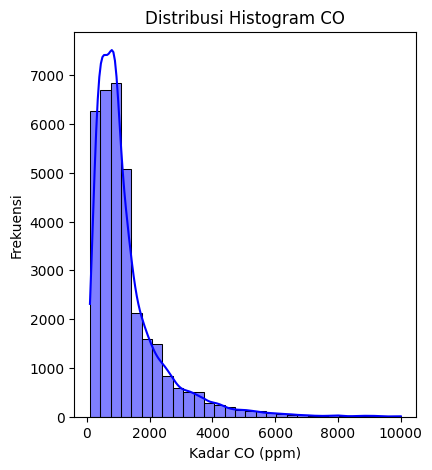

In [20]:
# Membuat visualisasi distribusi data karbon monoksida
plt.figure(figsize=(15, 5))

# Histogram CO
plt.subplot(1, 3, 1)
sns.histplot(df_prsa['CO'], bins=30, kde=True, color='blue')
plt.xlabel('Kadar CO (ppm)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Histogram CO')


Distribusi kadar CO menunjukkan pola left-skewed, di mana sebagian besar data berada di bawah 2000 ppm, tetapi ada beberapa nilai ekstrem yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah curah hujan (RAIN) membantu mengurangi kadar partikel Karbon Monoksida?

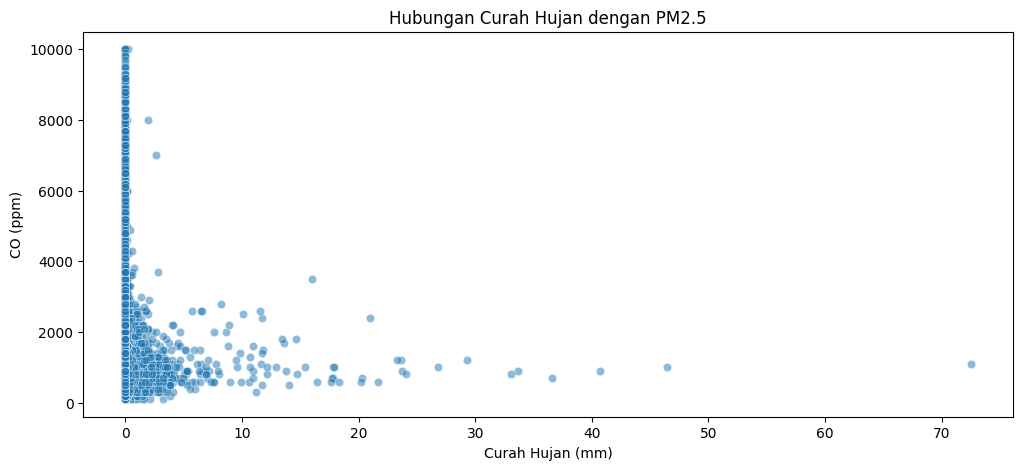

In [21]:
# Scatter plot antara curah hujan dan karbon monoksida
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_prsa['RAIN'], y=df_prsa['CO'], alpha=0.5)
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('CO (ppm)')
plt.title('Hubungan Curah Hujan dengan PM2.5')
plt.show()

**Insight:**

Terdapat tren penurunan kadar karbon monoksida (CO) seiring dengan meningkatnya curah hujan. Ini menunjukkan bahwa hujan berpotensi membantu mengurangi polusi udara dengan membersihkan partikel CO dari atmosfer. Namun, data menunjukkan banyak titik terkonsentrasi di sekitar nol curah hujan, yang mungkin mengindikasikan bahwa sebagian besar waktu tidak ada hujan, sehingga analisis lebih lanjut diperlukan.

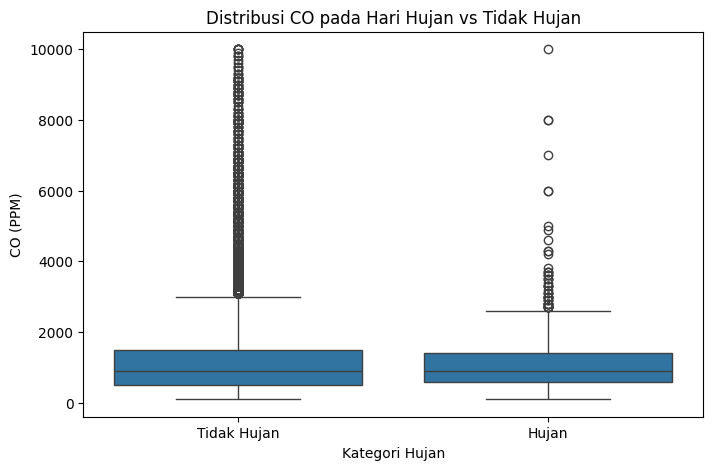

In [22]:
# Menambahkan kolom kategori hujan/tidak hujan
df_prsa['rain_category'] = df_prsa['RAIN'].apply(lambda x: 'Hujan' if x > 0 else 'Tidak Hujan')

# Box plot untuk CO
plt.figure(figsize=(8,5))
sns.boxplot(x=df_prsa['rain_category'], y=df_prsa['CO'])
plt.xlabel('Kategori Hujan')
plt.ylabel('CO (PPM)')
plt.title('Distribusi CO pada Hari Hujan vs Tidak Hujan')
plt.show()


**Insight:**

Berdasarkan box plot yang membandingkan kadar Karbon Monoksida (CO) pada hari hujan dan tidak hujan, terlihat bahwa distribusi CO pada kedua kategori memiliki pola yang hampir sama. Median kadar CO pada hari hujan dan tidak hujan berada dalam rentang yang mirip, menunjukkan bahwa curah hujan tidak memiliki dampak yang signifikan dalam mengurangi CO secara keseluruhan. Distribusi utama CO tetap berada dalam kisaran yang serupa di kedua kondisi. Hal ini mengindikasikan bahwa meskipun hujan mungkin sedikit membantu mengurangi kejadian kadar CO yang sangat tinggi, secara umum, polusi CO tetap bertahan di udara meskipun terjadi hujan.

### Pertanyaan 2: Bagaimana pola tren polusi karbon monoksida (CO) sepanjang tahun berdasarkan data bulanan?

In [23]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata CO per bulan
monthly_trend = df_prsa.groupby("month")["CO"].mean()
print(monthly_trend)

month
1     1774.887270
2     1379.238754
3     1332.264736
4      865.579646
5      856.851891
6     1077.912998
7      960.904221
8      864.360223
9      971.109045
10    1185.976039
11    1694.204426
12    2077.311498
Name: CO, dtype: float64


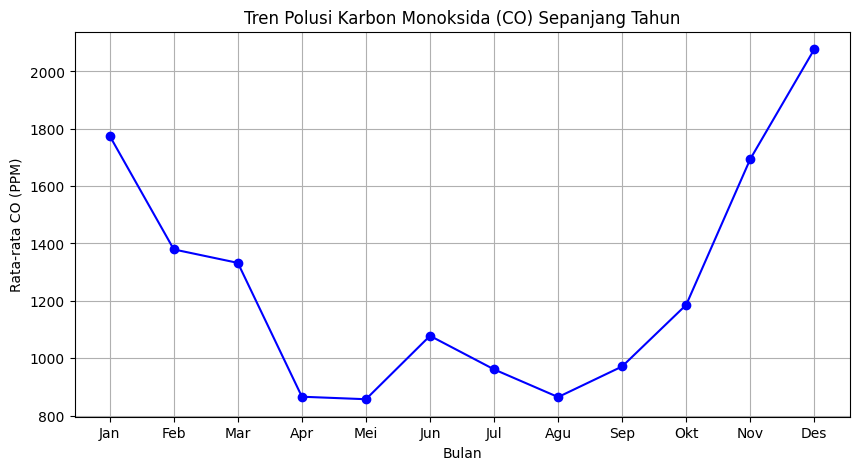

In [24]:
# Visualisasi tren CO sepanjang tahun
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker="o", linestyle="-", color="b")

# Menambahkan label dan judul
plt.xlabel("Bulan")
plt.ylabel("Rata-rata CO (PPM)")
plt.title("Tren Polusi Karbon Monoksida (CO) Sepanjang Tahun")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(True)

# Tampilkan plot
plt.show()

**Insight:**

- Polusi karbon monoksida (CO) mengalami fluktuasi sepanjang tahun dengan kadar tertinggi terjadi pada bulan Desember, diikuti oleh Januari.
- Sementara kadar terendah tercatat pada bulan April dan Agustus.
- Setelah bulan Agustus, kadar CO mulai meningkat secara bertahap hingga mencapai puncaknya pada akhir tahun.
- Terdapat pola penurunan kadar CO dari Januari hingga April, stabil di pertengahan tahun, dan kemudian meningkat kembali mulai September hingga Desember.

Atau singkatnya Kadar polusi karbon monoksida (CO) berfluktuasi sepanjang tahun, dengan tren menurun dari awal tahun hingga pertengahan tahun, kemudian meningkat kembali hingga mencapai puncaknya di akhir tahun.

## Conclusion

Conclution pertanyaan 1 :


- Curah hujan tidak memiliki dampak signifikan dalam mengurangi kadar Karbon Monoksida (CO) secara keseluruhan.
-  Meskipun hujan mungkin sedikit membantu mengurangi kejadian kadar CO yang sangat tinggi (outlier), polusi CO secara umum tetap bertahan di udara meskipun terjadi hujan.
- Distribusi kadar CO pada hari hujan dan tidak hujan memiliki pola yang hampir sama, dengan median yang berada dalam rentang yang mirip.
- Secara garis besar, kadar CO tetap berada dalam kisaran yang serupa di kedua kondisi.

Dengan kata lain, hujan tidak secara efektif membersihkan polusi Karbon Monoksida dari udara.



**Conclution pertanyaan 2**

Kadar polusi karbon monoksida (CO) berfluktuasi sepanjang tahun, dengan tren menurun dari awal tahun hingga pertengahan tahun, kemudian meningkat kembali hingga mencapai puncaknya di akhir tahun.